## The model 5 about Classification model

In [46]:
import warnings
from sklearn.datasets import load_iris

warnings.filterwarnings('ignore')

iris_dataset = load_iris()

In [48]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [53]:
# type of values
type_iris = iris_dataset['target_names']
type_iris

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
iris_dataset['feature_names'], iris_dataset['target'].shape

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 (150,))

In [57]:
iris_dataset['data'].shape

(150, 4)

In [60]:
import pandas as pd

iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


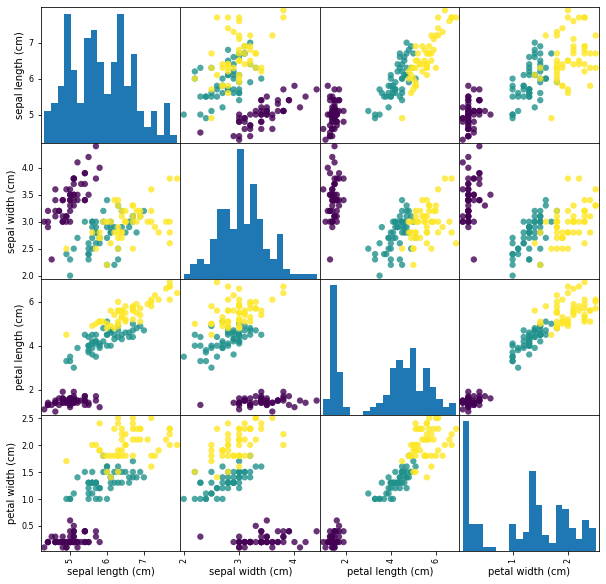

In [70]:
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe,
                                       c=iris_dataset['target'],
                                       figsize=(10, 10),
                                       hist_kwds={'bins': 20},
                                       marker='o',
                                       s=40,
                                       alpha=.8)

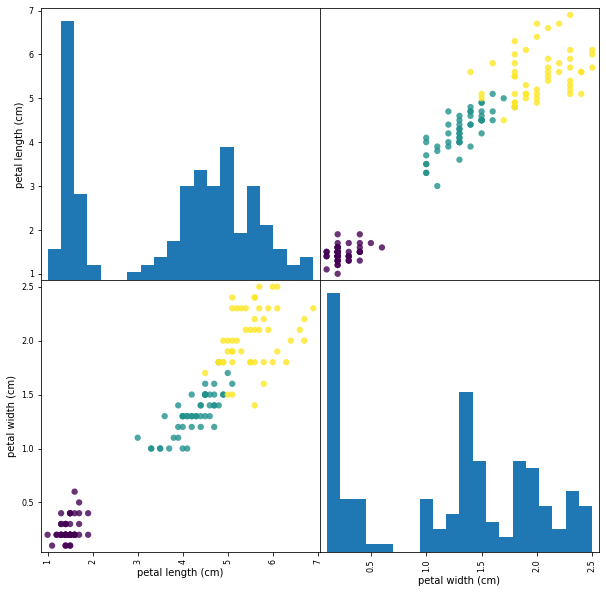

In [77]:
iris_dataframe_simple = pd.DataFrame(iris_dataset.data[:, 2:4], columns=iris_dataset.feature_names[2:4])
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe_simple, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data[:, 2:4], 
                                                    iris_dataset['target'],
                                                    random_state=0) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (112, 2), y_train shape: (112,),
X_test shape: (38, 2), y_test shape: (38,)


In [79]:
import numpy as np

x_train_concat = np.concatenate((x_train, y_train.reshape(112, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(38, 1)), axis=1)

print(f'X_train shape: {x_train_concat.shape},\n'
      f'X_test shape: {x_test_concat.shape}')
pd.DataFrame(x_train_concat).head(5)

X_train shape: (112, 3),
X_test shape: (38, 3)


,0,1,2
0,4.2,1.5,1.0
1,4.0,1.2,1.0
2,5.5,2.1,2.0
3,1.3,0.2,0.0
4,5.1,2.3,2.0


In [84]:
import math

def euclidean_distance(data1, data2):
    distance = 0
    for i in range(len(data1) - 1):
        distance += (data1[i] - data2[i])
    return math.sqrt(distance)

def get_neighbors(train, test, k=1):
    distances = [(train[i])[-1]], euclidean_distance(train[i], test)
    distances.sort(key=lambda elem: elem[1])
    
    neighbors = [distances[i][0] for i in range(k)

In [80]:
predictions = []

for x in range (len(x_test_concat)):
    neighbors = get_neighbors(x_train_concat, x_test_concat[x], k=5)
    print(neighbors)
#     result = prediction(neighbors)
#     predictions.append(result)
# #     print(f'predicted = {result}, actual = {x_test_concat[x][-1]}') # если есть интерес посмотреть, какие конкретно прогнозы некорректны
# accuracy = accuracy(x_test_concat, predictions)
# print(f'Accuracy: {accuracy}')

NameError: name 'get_neighbors' is not defined

## Decision Trees

In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [4]:
data.head()

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0


In [5]:
X = data[['X_1', 'X_2']]
y = data.Y

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X, y)
clf

DecisionTreeClassifier(criterion='entropy')

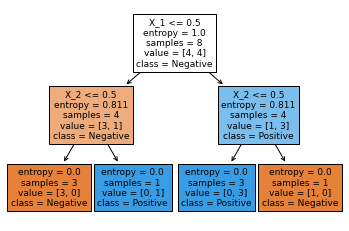

In [8]:
tree.plot_tree(clf, 
               feature_names=X.columns,
               class_names=['Negative', 'Positive'],
               filled=True)
plt.show()

## homework about Decision Tree


In [12]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## KNN - k-nearest neighbors

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris() # возвращает объект с несколькими полями

In [5]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(iris_dataset['target'].shape)

(150,)


In [8]:
print(type(iris_dataset['data'])) 
iris_dataset['data'].shape

<class 'numpy.ndarray'>


(150, 4)

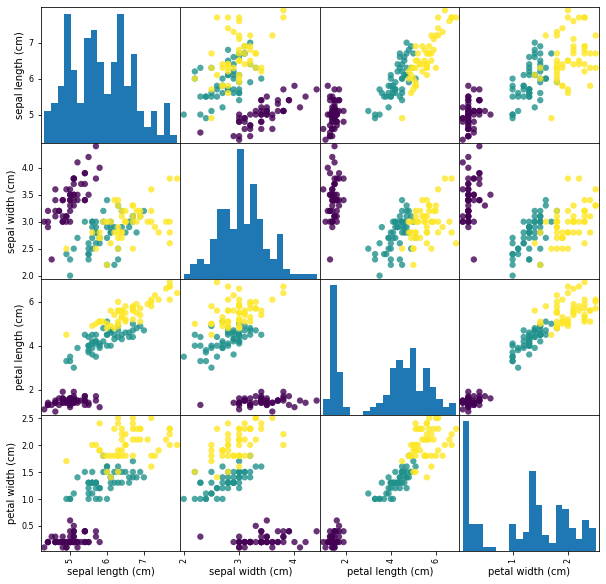

In [9]:
import pandas as pd

iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

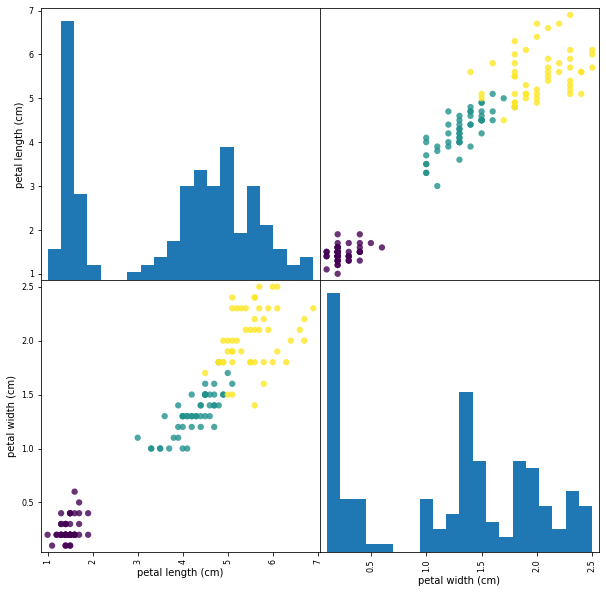

In [10]:
iris_dataframe_simple = pd.DataFrame(iris_dataset.data[:, 2:4], columns=iris_dataset.feature_names[2:4])
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe_simple, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

In [25]:
x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data[:, 2:4],
                 iris_dataset['target'],
                 random_state=0)
print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (112, 2), y_train shape: (112,),
X_test shape: (38, 2), y_test shape: (38,)


In [29]:
x_train_concat = np.concatenate((x_train, y_train.reshape(-1, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(-1, 1)), axis=1)

In [34]:
x_train_concat.shape, x_test_concat.shape

((112, 3), (38, 3))

In [107]:
x_train_concat[1][-1]

1.0

In [144]:
import math

def euclidean_distance(data1, data2):
    distance = 0
    for i in range (len(data1) - 1):
        distance += (data1[i] - data2[i]) ** 2
    return math.sqrt(distance)

def get_neighbors(train, test, k=1):
    distances = [(train[i][-1], euclidean_distance(train[i], test))
                  for i in range (len(train))]
    distances.sort(key=lambda elem: elem[1])
    neighbors = [distances[i][0] for i in range (k)]
    return neighbors

def prediction(neighbors):
    count = {}
    for instance in neighbors:
        if instance in count:
            count[instance] +=1
        else :
            count[instance] = 1
    target = int(max(count.items(), key=lambda x: x[1])[0])
    return target


def accuracy(x, y):
    if len(x) == len(y):
        count = 0
        for i in range(len(x)):
            if x[i] == y[i]:
                count +=1 
        return count/len(x)
    else:
        raise('space is not eqaute length')

In [145]:
predictions = []
for x in range (len(x_test_concat)):
    neighbors = get_neighbors(x_train_concat, x_test_concat[x], k=5)
    result = prediction(neighbors)
    predictions.append(result)
#     print(f'predicted = {result}, actual = {x_test_concat[x][-1]}') # если есть интерес посмотреть, какие конкретно прогнозы некорректны
metrix = accuracy(y_test, predictions)
print(f'Accuracy: {metrix}')

Accuracy: 0.9736842105263158


In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
predictions = knn.predict(x_test)
metrix = accuracy(y_test, predictions)
print(f'Accuracy: {metrix}')

Accuracy: 0.9736842105263158


In [151]:
def prediction(neighbors):
    count = {}
    for instance in neighbors:
        if instance in count:
            count[instance] +=1
        else :
            count[instance] = 1
    print(count.items())
    target = int(max(count.items(), key=lambda x: x[1])[0])
    return target

a = [1, 1, 1, 0, 0]
prediction(a)

dict_items([(1, 3), (0, 2)])


1

In [162]:
a = [1, 4, 3, 6, 2]

def funcSort(x):
    return x%2

a.sort(key=funcSort)
a

[4, 6, 2, 1, 3]

In [161]:
a = [1, 4, 3, 6, 2]
a.sort()
a

[1, 2, 3, 4, 6]